In [ ]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Импортируем CSV в датафрейм

In [ ]:
# Подключаем csv файл, который выкачиваем из Key Ratio в Morningstar. 
# Тут данные сразу преобразуются в массив данных, так что дополнительных действий делать не нужно
data = pd.read_csv('/Users/liliaromanova/Downloads/CHMF Key Ratios.csv', skiprows=2, index_col='Unnamed: 0')

In [ ]:
# Проверяем наличие данных
data.head()

,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,TTM
Revenue USD Mil,"12,819","15,812","14,104","13,312","8,296","6,396","5,916","7,848","8,580","8,157","7,080"
Gross Margin %,32.0,98.5,23.5,22.3,34.3,40.8,39.6,39.7,42.7,39.8,39.8
Operating Income USD Mil,"2,095","2,889","1,321","1,192","1,568","1,668","1,515","2,113","2,702","2,305","1,817"
Operating Margin %,16.3,18.3,9.4,9.0,18.9,26.1,25.6,26.9,31.5,28.3,25.7
Net Income USD Mil,-575,"2,035",762,83,"-1,602",605,"1,621","1,356","2,051","1,766","1,003"


In [ ]:
# Удаляем запятые из данных
data = data.apply(lambda x: x.str.replace(',', ''))

In [ ]:
# проверяем типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Revenue USD Mil to Asset Turnover
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   2010-12  78 non-null     object
 1   2011-12  83 non-null     object
 2   2012-12  84 non-null     object
 3   2013-12  84 non-null     object
 4   2014-12  78 non-null     object
 5   2015-12  85 non-null     object
 6   2016-12  90 non-null     object
 7   2017-12  88 non-null     object
 8   2018-12  90 non-null     object
 9   2019-12  86 non-null     object
 10  TTM      73 non-null     object
dtypes: object(11)
memory usage: 9.5+ KB


Определяем функции поиска данных

In [ ]:
def search_value(index_name, date):
    '''This function return a specific stock metric of at a specific date
    from dataframe
    '''
    return float(data.loc[index_name, date])

In [ ]:
def historical_value(index_name):
    '''This function return a specific stock line metric from dataframe
    '''
    return data.loc[index_name, ].astype(float)

### Получаем основые финансовые метрики

(1)Получаем количество акций Shares Outstanding

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('Shares Mil')

2010-12    1005.0
2011-12    1005.0
2012-12     839.0
2013-12     811.0
2014-12     811.0
2015-12     811.0
2016-12     811.0
2017-12     842.0
2018-12     848.0
2019-12     849.0
TTM         849.0
Name: Shares Mil, dtype: float64

(2) EPS

In [ ]:
historical_value('Earnings Per Share USD')

2010-12   -0.57
2011-12    2.02
2012-12    0.91
2013-12    0.11
2014-12   -1.97
2015-12    0.75
2016-12    2.00
2017-12    1.64
2018-12    2.47
2019-12    2.08
TTM        1.21
Name: Earnings Per Share USD, dtype: float64

(3)Dividend Rate

In [ ]:
historical_value('Dividends USD')

2010-12    0.13
2011-12    0.48
2012-12    0.38
2013-12    0.26
2014-12    1.34
2015-12    0.86
2016-12    1.16
2017-12    1.87
2018-12    2.42
2019-12    1.90
TTM        1.40
Name: Dividends USD, dtype: float64

(4)Dividend Yield

In [ ]:
historical_value('Payout Ratio % *')

2010-12      NaN
2011-12     10.5
2012-12     29.4
2013-12    170.3
2014-12      NaN
2015-12      NaN
2016-12     63.3
2017-12    123.6
2018-12     94.7
2019-12     93.6
TTM        115.6
Name: Payout Ratio % *, dtype: float64

(5)Debt/Equity Ratio

In [ ]:
historical_value('Debt/Equity')

2010-12    0.67
2011-12    0.72
2012-12    0.60
2013-12    0.59
2014-12    0.94
2015-12    0.86
2016-12    0.44
2017-12    0.45
2018-12    0.49
2019-12    0.72
TTM        0.78
Name: Debt/Equity, dtype: float64

(6)Book Value Per Share

In [ ]:
historical_value('Book Value Per Share * USD')

2010-12    678.87
2011-12    654.05
2012-12    627.57
2013-12    276.54
2014-12    369.99
2015-12    226.67
2016-12    220.62
2017-12    225.75
2018-12    247.29
2019-12    244.96
TTM        231.71
Name: Book Value Per Share * USD, dtype: float64

(7)ROE (Return on Equity)

In [ ]:
historical_value('Return on Equity %')

2010-12    -7.71
2011-12    29.67
2012-12    10.98
2013-12     1.17
2014-12   -32.67
2015-12    23.85
2016-12    61.42
2017-12    42.32
2018-12    65.65
2019-12    55.82
TTM        34.31
Name: Return on Equity %, dtype: float64

(8)Current Ratio

In [ ]:
historical_value('Current Ratio')

2010-12    1.50
2011-12    1.66
2012-12    1.69
2013-12    1.92
2014-12    2.09
2015-12    2.26
2016-12    1.56
2017-12    1.77
2018-12    1.85
2019-12    1.95
TTM        1.40
Name: Current Ratio, dtype: float64

In [ ]:
# Назначаем переменные количества акций за последний и предыдущий периоды
numberOfShares0 = search_value('Shares Mil', 'TTM')
numberOfShares1 = search_value('Shares Mil', '2019-12') # Периоды указываем как в шаге выше

In [ ]:
# Назначаем переменные операционного CashFlow
operatingCashFlow0 = search_value('Operating Cash Flow USD Mil', 'TTM')
operatingCashFlow1 = search_value('Operating Cash Flow USD Mil', '2019-12') # Периоды указываем как в шаге выше
operatingCashFlow2 = search_value('Operating Cash Flow USD Mil', '2018-12')
operatingCashFlow3 = search_value('Operating Cash Flow USD Mil', '2017-12') # незабыть умножить на миллион

## Get Stock Price

In [ ]:
# Получаем данные с yahoo finance для одного тикера
price = wb.DataReader('CHMF.ME', data_source='yahoo', start='2010-1-1') 

Latest P/E

In [ ]:
latest_price = price.loc['2020-10-27','Close']
latest_eps = search_value('Earnings Per Share USD', '2019-12')# Периоды указываем как в шаге выше
latest_PtoE = latest_price/latest_eps
print(latest_PtoE)

511.153822678786


Latest P/BV

In [ ]:
latest_price = price.loc['2020-07-15','Close']
latest_eps = search_value('Book Value Per Share * USD', '2019-12')
latest_PtoBV = latest_price/latest_eps
print(latest_PtoBV)

3.600587851077727


Traspose Dataframe

In [ ]:
data = data.T

In [ ]:
col_names = ['Shares Mil','Earnings Per Share USD','Dividends USD',
            'Payout Ratio % *', 'Debt/Equity', 'Book Value Per Share * USD',
            'Return on Equity %', 'Current Ratio']
data = data[col_names]
data.head()

,Shares Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Debt/Equity,Book Value Per Share * USD,Return on Equity %,Current Ratio
2010-12,1005,-0.57,0.13,NaN,0.67,678.87,-7.71,1.50
2011-12,1005,2.02,0.48,10.5,0.72,654.05,29.67,1.66
2012-12,839,0.91,0.38,29.4,0.60,627.57,10.98,1.69
2013-12,811,0.11,0.26,170.3,0.59,276.54,1.17,1.92
2014-12,811,-1.97,1.34,NaN,0.94,369.99,-32.67,2.09


In [ ]:
new_col = ['shares_outstanding', 'earning_per_share', 'dividend_rate', 
           'dividend_yield', 'debt_to_equity', 'book_value_per_share',
          'return_on_equity', 'current_ratio']
data.columns = new_col
data.head()

,shares_outstanding,earning_per_share,dividend_rate,dividend_yield,debt_to_equity,book_value_per_share,return_on_equity,current_ratio
2010-12,1005,-0.57,0.13,NaN,0.67,678.87,-7.71,1.50
2011-12,1005,2.02,0.48,10.5,0.72,654.05,29.67,1.66
2012-12,839,0.91,0.38,29.4,0.60,627.57,10.98,1.69
2013-12,811,0.11,0.26,170.3,0.59,276.54,1.17,1.92
2014-12,811,-1.97,1.34,NaN,0.94,369.99,-32.67,2.09


In [ ]:
data = data.apply(pd.to_numeric)

## Calculating intrinsic value

Расчет методом дивидендов и балансовой стоимости

In [ ]:
dvd_avg = data['dividend_rate'].mean() # Определим средний дивиденд
print(dvd_avg)

1.1090909090909091


In [ ]:
risk_free_rate = 0.18
# The discounted capital for the dividend of 3-year later
dvd_avg/(1+risk_free_rate)**3
# The discounted capital for the dividend of 10-year later
#dvd_avg/(1+risk_free_rate)**10

0.6750269678806677

In [ ]:
dvd_total = 0
for i in range(1,11):
    dvd_total = dvd_total + dvd_avg/(1+risk_free_rate)**i
print(dvd_total)

4.984350254370713


Estimate future book value

In [ ]:
book_value = data['book_value_per_share']
growth_rate_of_9y= book_value['2019-12']/book_value['2011-12'] # Периоды указываем как в шаге выше
avg_growth_rate = growth_rate_of_9y**(1/9)
print(avg_growth_rate)

0.8966219327103968


In [ ]:
bvps_pred = book_value['2019-12']*(avg_growth_rate**10) # Периоды указываем как в шаге выше
print(bvps_pred)

82.26000941159776


## Стоимость акции по дивам и балансовой стоимости (наивный метод)

In [ ]:
data_intrinsic = bvps_pred + dvd_total
print(data_intrinsic)

87.24435966596847


In [ ]:
data_intrinsic - latest_price #Маржа безопасности

-794.7556403340316

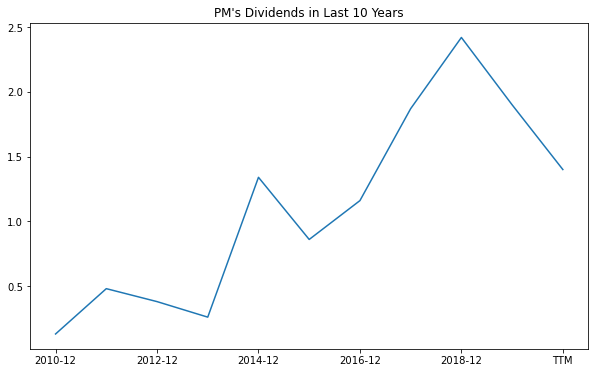

In [ ]:
data['dividend_rate'].plot(figsize=(10,6), title="PM's Dividends in Last 10 Years")

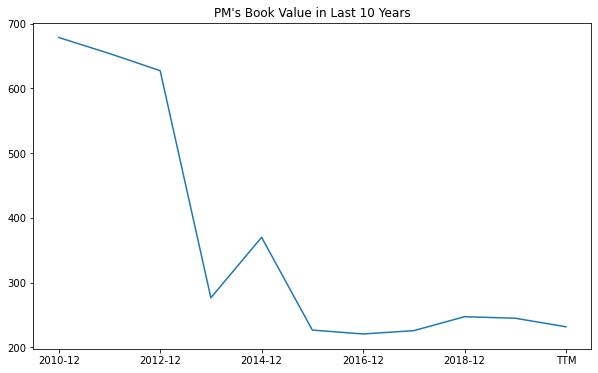

In [ ]:
data['book_value_per_share'].plot(figsize=(10,6), title="PM's Book Value in Last 10 Years")

### Расчет стоимости по дивам и балансовой стоимости с помощью линейной регрессии

In [1]:
# 'year_index' as the order of the year
data['year_index'] = range(1, len(data) + 1)
# add intercept
data['intercept'] = 1

NameError: ignored

In [2]:
data.head()

NameError: ignored

In [ ]:
# modeling
bvps_model = sm.OLS(data['book_value_per_share'], data[['year_index','intercept']]).fit()

In [ ]:
bvps_pred_lr = bvps_model.predict([19,1])[0] #Прогнозируем балансовую стоимость через 10 лет
print(bvps_pred_lr)

In [ ]:
data_new = data.dropna(subset = ['dividend_rate']) #Избавиться от NAN

In [ ]:
dvd_model = sm.OLS(data_new['dividend_rate'], data_new[['year_index','intercept']]).fit()

In [ ]:
dvd_model.predict([19,1])[0] #Определить дивиденд через 10 лет

In [ ]:
# Дивиденды за 10 лет
dvd_total_lr = 0
current_year_order = 9
for i in range(1,11):
    dvd_new = dvd_model.predict([current_year_order + i,1])[0]
    dvd_total_lr = dvd_total_lr + dvd_new/(1+risk_free_rate)**i
print(dvd_total_lr)

In [ ]:
aapl_intrinsic_lr = dvd_total_lr + bvps_pred_lr
print(aapl_intrinsic_lr)

In [ ]:
aapl_intrinsic_lr - latest_price #Маржа безопасности

Пиотроски F-score

In [ ]:
# Подключаем файл xls с Балансом компании, выкачиваем его из Morningstar. 
file = '/Users/liliaromanova/Downloads/Balance Sheet.xls'
xl = pd.ExcelFile(file)

In [ ]:
# Смотрим, какие Листы есть в файле, определяем на каком находятся нужные данные
print(xl.sheet_names)

In [ ]:
# Получаем данные с нужного листа и записываем их в массив данных. 
# Делаем первую колонку индексной, чтобы она дальше не использовалась в вычислениях
df1 = xl.parse('CHMF', index_col='CHMF_BalanceSheet_Annual_As_Originally_Reported' )

In [ ]:
#Удаляем запятые
df1 = df1.apply(lambda x: x.str.replace(',', ''))

In [ ]:
# Проверяем наличие данных
df1.head()

In [ ]:
# Проверяем тип данных
df1.info()

In [ ]:
def search_value(index_name, date):
    '''This function return a specific stock metric of at a specific date
    from dataframe
    '''
    return float(df1.loc[index_name, date])

In [ ]:
def historical_value(index_name):
    '''This function return a specific stock line metric from dataframe
    '''
    return df1.loc[index_name, ].astype(float)

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('Total Assets')

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('Total Liabilities')

In [ ]:
# Назначаем переменные активов и долгов
totalAssets0 = search_value('Total Assets', '2019')  # Периоды указываем как в шаге выше
totalAssets1 = search_value('Total Assets', '2018')
totalAssets2 = search_value('Total Assets', '2017')
totalLiabilities0 = search_value('Total Liabilities', '2019')
totalLiabilities1 = search_value('Total Liabilities', '2018')
longTermDebt0 = search_value('            Long Term Debt and Capital Lease Obligation', '2019') 
longTermDebt1 = search_value('            Long Term Debt and Capital Lease Obligation', '2018')
# Названия строк из файла приходится брать с пробелами, как в самом файле

In [ ]:
# Подключаем файл xls с Доходами компании, выкачиваем его из Morningstar. 
file2 = '/Users/liliaromanova/Downloads/Income Statement.xls'
xl2 = pd.ExcelFile(file2)

In [ ]:
# Смотрим, какие Листы есть в файле, определяем на каком находятся нужные данные
print(xl2.sheet_names)

In [ ]:
# Получаем данные с нужного листа и записываем их в массив данных. 
# Делаем первую колонку индексной, чтобы она дальше не использовалась в вычислениях
df2 = xl2.parse('CHMF', index_col='CHMF_IncomeStatement_Annual_As_Originally_Reported' )

In [ ]:
#Удаляем запятые
df2 = df2.apply(lambda x: x.str.replace(',', '')) 

In [ ]:
# Проверяем наличие данных
df2.head()

In [ ]:
# Проверяем типы данных
df1.info()

In [ ]:
def search_value(index_name, date):
    '''This function return a specific stock metric of at a specific date
    from dataframe
    '''
    return float(df2.loc[index_name, date])

In [ ]:
def historical_value(index_name):
    '''This function return a specific stock line metric from dataframe
    '''
    return df2.loc[index_name, ].astype(float)

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('    Total Revenue')

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('Net Income Available to Common Stockholders')

In [ ]:
# Проверяем вид и наличие данных, а также точные даты, они будут использоваться ниже
historical_value('Gross Profit')

In [ ]:
# Назначаем переменные доходности
# Периоды указываем как в шаге выше
netIncome0 = search_value('Net Income Available to Common Stockholders', 'TTM')
netIncome1 = search_value('Net Income Available to Common Stockholders', '2019') 
grossProfit0 = search_value('Gross Profit', 'TTM')
grossProfit1 = search_value('Gross Profit', '2019')
revenue0 = search_value('    Total Revenue', 'TTM')
revenue1 = search_value('    Total Revenue', '2019')

In [ ]:
# Считаем F-Score. Формула не идеальная, к ней есть вопросы

cashflow_op = (operatingCashFlow0 + operatingCashFlow1 + operatingCashFlow2 + operatingCashFlow3) * 1000000

ROA_FS = (round(netIncome0/((totalAssets0 + totalAssets1)/2), 2)>0)  
CFO_FS = int(operatingCashFlow0 * 1000000>0)
ROA_D_FS = int((round(netIncome0/((totalAssets0 + totalAssets1)/2), 2))>
               (round(netIncome1/((totalAssets1 + totalAssets2)/2), 2)))
CFO_ROA_FS = int((cashflow_op/totalAssets0)>(netIncome0/
                    ((totalAssets0 + totalAssets1)/2)))          
CR_FS = int((totalAssets0/totalLiabilities0)>      
             (totalAssets1/totalLiabilities1))           
LTD_FS = int(longTermDebt0 <= longTermDebt1)
DILUTION_FS = int(numberOfShares0  <= numberOfShares1)
GM_FS = int(grossProfit0/revenue0 > grossProfit1/revenue1)
ATO_FS = int((revenue0/((totalAssets0 + totalAssets1)/2)) >
            (revenue1/((totalAssets1 + totalAssets2)/2)))
F_score = ROA_FS + CFO_FS + ROA_D_FS + CFO_ROA_FS + LTD_FS + CR_FS + DILUTION_FS + GM_FS + ATO_FS  

print(f'f_score is {F_score}')


# Вопросы к методике 
#1. ПРи расчете ROA_FS, мы исследуем число на предмет положительности относительно нуля, но это может быть только в одном случае, если числитель больше нуля, тогда в этой формуле знаменатель не нужен, ведь он в принципе не может быть меньше ноля
#2. Зачем нам складывать в знаменателях значения за 2 года?
#3. При сравнениее OCF не обязательно приводить показатель к миллиардам, т.к. нас интересует в принципе он больше нуля или нет
#4. Почему мы считаем cashflow_op как сумма за 4 последних года, если в принципе нас интересует конкретно за последний год

